In [ ]:
# Q1) predict whether a developer’s issue will be resolved based on the initial prompt with ChatGPT?

In [90]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from gensim import corpora, models
from sklearn.model_selection import train_test_split

In [92]:
file_path = 'C:/Users/Jitendrasai/Desktop/Dataset.xlsx'
num_columns_to_read = len(pd.read_excel(file_path, nrows=1).columns)
df = pd.read_excel(file_path, usecols=range(num_columns_to_read))

# cleaning data
df['cleaned_text'] = df['Initial Prompt'].replace(r'\n', '', regex=True) #html cleaning
df['cleaned_text'] = df['Initial Prompt'].replace(r'<[^>]+>', '', regex=True) #html cleaning
df['cleaned_text'] = df['cleaned_text'].replace(r'http\S+', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].replace(r'[^A-Za-z0-9\s]', '', regex=True)
df['cleaned_text'] = df['cleaned_text'].str.lower()

# preprocessing
df = df.dropna(how='any', subset=['Yes/No (Resolved or not)'])
df['Yes/No (Resolved or not)'] = df['Yes/No (Resolved or not)'].replace(['No '], 'No')
df['Yes/No (Resolved or not)'] = df['Yes/No (Resolved or not)'].replace(['Yes`', ' Yes'], 'Yes')

#removing stop words
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    return " ".join(tokens)

df['cleaned_text'] = df['cleaned_text'].apply(process_text)

# Display the first few rows of the processed data
df.head()

,Initial Prompt,Yes/No (Resolved or not),NumberOfPrompts,L/H (Low or High),Programming Language,which type of technology (DL/ML/WEB/None),cleaned_text
0,How to add a java class in a generic container...,Yes,3.0,L,Java,NaN,add java class generic container testcontainer...
1,How to run a java class inside of a container ...,Yes,2.0,L,Java,NaN,run java class inside container testcontainers
2,"I have a github repo on python, how to make it...",Yes,1.0,L,Python,NaN,github repo python make installable pip instal...
3,I'm using Terraform to manage some infrastruct...,Yes,2.0,L,HCL,NaN,im using terraform manage infrastructure gcp u...
4,I have a challenge for you. I'm working in a r...,No,8.0,H,TypeScript,WEB,challenge im working reacttypescript applicati...


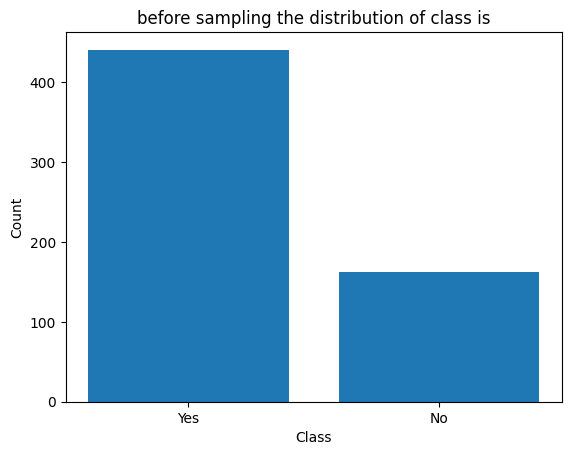

In [93]:
import matplotlib.pyplot as plt
number= df['Yes/No (Resolved or not)'].value_counts()
plt.bar(['Yes','No'], number.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('before sampling the distribution of class is')
plt.show()

In [94]:
# Here we are finding the most repeated word and generating wordcloud

The most repeated word is 'using' with a count of 157.


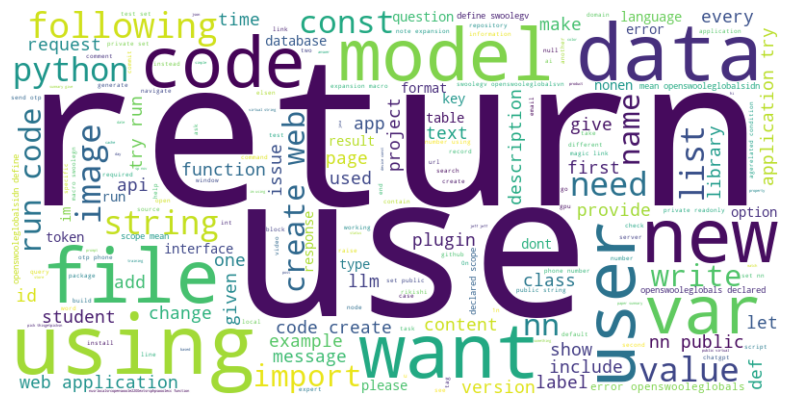

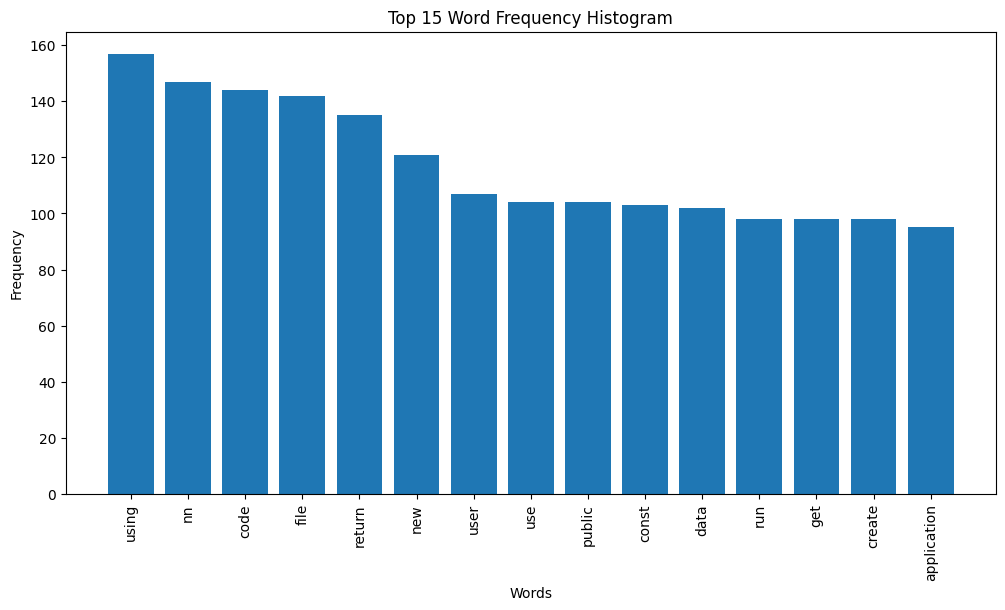

In [95]:
def find_most_repeated_word(text):
    words = text.split()
    word_counts = Counter(words)
    most_repeated_word, count = word_counts.most_common(1)[0]
    return most_repeated_word, count

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def generate_histogram(text, top_n=15):
    words = text.split()
    word_counts = Counter(words)
    top_words, top_counts = zip(*word_counts.most_common(top_n))
    plt.figure(figsize=(12, 6))
    plt.bar(top_words, top_counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {top_n} Word Frequency Histogram')
    plt.xticks(rotation=90)
    plt.show()


input_text = " ".join(df['cleaned_text'])

most_repeated_word, count = find_most_repeated_word(input_text)
print(f"The most repeated word is '{most_repeated_word}' with a count of {count}.")

generate_word_cloud(input_text)
generate_histogram(input_text)

In [70]:
# Ensuring a proportional representation of both 'Yes' and 'No'
#train_df, test_df = train_test_split(df, train_size=0.8, stratify=df['Yes/No (Resolved or not)'], random_state=42)
#x_train=train_df.drop(columns=['Yes/No (Resolved or not)'])
#y_train=train_df['Yes/No (Resolved or not)']
#x_test=test_df.drop(columns=['Yes/No (Resolved or not)'])
#y_test=test_df['Yes/No (Resolved or not)']

In [71]:
# here we are vectorizing the text data

In [96]:
tfidf_vectorizer = TfidfVectorizer()
def calculate_tf_idf(corpus):
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    return tfidf_matrix.toarray()
def calculate_tf_idf_test(corpus):
    tfidf_matrix = tfidf_vectorizer.transform(corpus)
    return tfidf_matrix.toarray()

def create_bag_of_words(corpus):
    count_vectorizer = CountVectorizer()
    bag_of_words = count_vectorizer.fit_transform(corpus)
    return bag_of_words

def train_word2vec_model(sentences, vector_size=100, window=5, min_count=1, sg=0):
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=sg)
    return model

In [97]:
#x_train_vectors = calculate_tf_idf(x_train['cleaned_text'])
#x_test_vectors = calculate_tf_idf(x_test['cleaned_text'])
vectors=calculate_tf_idf(df['cleaned_text'])


In [98]:
# DATA SAMPLING
# Here i am balancig the imabalance data by using smote

In [99]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.8,random_state=42)
df['Yes/No (Resolved or not)'] = df['Yes/No (Resolved or not)'].map({'Yes': 1, 'No': 0})
x_data_sampled,y_data_sampled=over.fit_resample(vectors,df['Yes/No (Resolved or not)'])
X_train, X_test, y_train, y_test = train_test_split(x_data_sampled, y_data_sampled, test_size=0.2, random_state=42)

In [100]:
print(x_data_sampled.shape)
y_data_sampled.value_counts()
#print(x_.shape)
#print(x_test_vectors.shape)
#print(y_test.shape)

(793, 6402)


Yes/No (Resolved or not)
1    441
0    352
Name: count, dtype: int64

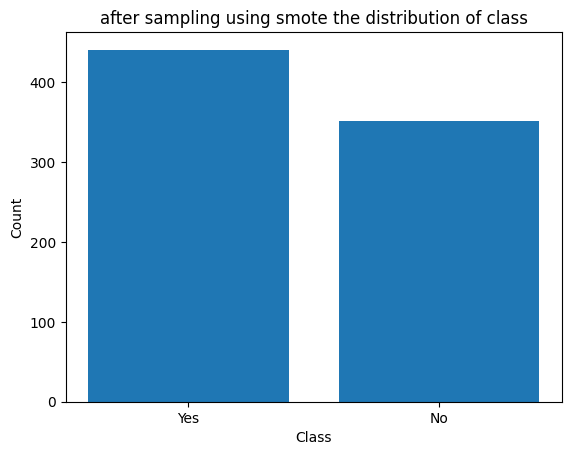

In [101]:
import matplotlib.pyplot as plt
counts = y_data_sampled.value_counts()
plt.bar(['Yes','No'], counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('after sampling using smote the distribution of class')
plt.show()

In [102]:
# MACHINE LEARNING MODEL 
# LOGESTIC REGRESSION

In [103]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from sklearn.metrics import classification_report
from bs4 import BeautifulSoup

In [104]:
tags_2 = list(set(df['Yes/No (Resolved or not)']))

In [105]:
from sklearn.linear_model import LogisticRegression

logreg =  LogisticRegression(n_jobs=1, C=1e5)
        
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.8742138364779874
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        73
           1       0.88      0.88      0.88        86

    accuracy                           0.87       159
   macro avg       0.87      0.87      0.87       159
weighted avg       0.87      0.87      0.87       159



In [106]:
test = "give me definition of python"
testsample=calculate_tf_idf_test([test])

In [107]:
#testsample.shape
logreg.predict(testsample)
v=logreg.predict(testsample)
if v[0]==1:
    print("Yes")
else:
    print("No")

Yes


In [108]:
# Basic Neural Network

Epoch 1/20
20/20 [==============================] - 1s 30ms/step - loss: 0.6853 - accuracy: 0.6861 - val_loss: 0.6746 - val_accuracy: 0.7358
Epoch 2/20
20/20 [==============================] - 0s 13ms/step - loss: 0.6362 - accuracy: 0.8628 - val_loss: 0.6160 - val_accuracy: 0.7736
Epoch 3/20
20/20 [==============================] - 0s 13ms/step - loss: 0.5139 - accuracy: 0.9069 - val_loss: 0.4952 - val_accuracy: 0.8365
Epoch 4/20
20/20 [==============================] - 0s 12ms/step - loss: 0.3236 - accuracy: 0.9385 - val_loss: 0.3836 - val_accuracy: 0.8679
Epoch 5/20
20/20 [==============================] - 0s 11ms/step - loss: 0.1992 - accuracy: 0.9432 - val_loss: 0.3506 - val_accuracy: 0.8868
Epoch 6/20
20/20 [==============================] - 0s 10ms/step - loss: 0.1492 - accuracy: 0.9495 - val_loss: 0.3433 - val_accuracy: 0.9057
Epoch 7/20
20/20 [==============================] - 0s 10ms/step - loss: 0.1287 - accuracy: 0.9448 - val_loss: 0.3599 - val_accuracy: 0.8805
Epoch 8/20
20

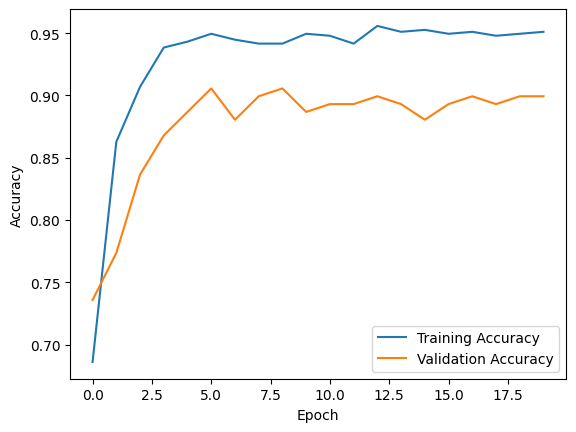

In [109]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing.sequence import pad_sequences

X_train, X_test, y_train, y_test = train_test_split(x_data_sampled, y_data_sampled, test_size=0.2, random_state=42)
#y_train = y_train.astype(int)
#y_test = y_test.astype(int)

maxlen = 100  # Sequence length
X_train_pad = pad_sequences(X_train, maxlen=maxlen)
X_test_pad = pad_sequences(X_test, maxlen=maxlen)
# Define the CNN model
model = models.Sequential()


model.add(layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#CNN

In [114]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Assuming x_data_sampled contains your text data and y_data_sampled contains corresponding labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data_sampled, y_data_sampled, test_size=0.2, random_state=42)

# Pad sequences
maxlen = 100  # Sequence length
X_train_pad = pad_sequences(X_train, maxlen=maxlen)
X_test_pad = pad_sequences(X_test, maxlen=maxlen)

# Reshape the data to be suitable for 1D CNN
X_train_pad = X_train_pad.reshape((X_train_pad.shape[0], X_train_pad.shape[1], 1))
X_test_pad = X_test_pad.reshape((X_test_pad.shape[0], X_test_pad.shape[1], 1))

# Define the 1D CNN model
model = models.Sequential()

model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(maxlen, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=20, validation_data=(X_test_pad, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f'Test accuracy: {test_acc}')



Epoch 1/15
20/20 [==============================] - 1s 16ms/step - loss: 0.6928 - accuracy: 0.5505 - val_loss: 0.6927 - val_accuracy: 0.5409
Epoch 2/15
20/20 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5599 - val_loss: 0.6923 - val_accuracy: 0.5409
Epoch 3/15
20/20 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5599 - val_loss: 0.6918 - val_accuracy: 0.5409
Epoch 4/15
20/20 [==============================] - 0s 7ms/step - loss: 0.6909 - accuracy: 0.5599 - val_loss: 0.6916 - val_accuracy: 0.5409
Epoch 5/15
20/20 [==============================] - 0s 8ms/step - loss: 0.6905 - accuracy: 0.5599 - val_loss: 0.6912 - val_accuracy: 0.5409
Epoch 6/15
20/20 [==============================] - 0s 13ms/step - loss: 0.6900 - accuracy: 0.5599 - val_loss: 0.6910 - val_accuracy: 0.5409
Epoch 7/15
20/20 [==============================] - 0s 7ms/step - loss: 0.6896 - accuracy: 0.5599 - val_loss: 0.6908 - val_accuracy: 0.5409
Epoch 8/15
20/20 [

In [ ]:
# CNN with LSTM

In [115]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Assuming x_data_sampled contains your text data and y_data_sampled contains corresponding labels (0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data_sampled, y_data_sampled, test_size=0.2, random_state=42)

# Pad sequences
maxlen = 100  # Sequence length
X_train_pad = pad_sequences(X_train, maxlen=maxlen)
X_test_pad = pad_sequences(X_test, maxlen=maxlen)

# Reshape the data to be suitable for 1D CNN
X_train_pad = X_train_pad.reshape((X_train_pad.shape[0], X_train_pad.shape[1], 1))
X_test_pad = X_test_pad.reshape((X_test_pad.shape[0], X_test_pad.shape[1], 1))

# Define the CNN-LSTM model
model = models.Sequential()

# CNN layers
model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(maxlen, 1)))
model.add(layers.MaxPooling1D(pool_size=2))

# LSTM layer
model.add(layers.LSTM(64))

# Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=20, validation_data=(X_test_pad, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_pad, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/20
20/20 [==============================] - 4s 58ms/step - loss: 0.6929 - accuracy: 0.5473 - val_loss: 0.6928 - val_accuracy: 0.5409
Epoch 2/20
20/20 [==============================] - 1s 28ms/step - loss: 0.6923 - accuracy: 0.5599 - val_loss: 0.6923 - val_accuracy: 0.5409
Epoch 3/20
20/20 [==============================] - 0s 24ms/step - loss: 0.6917 - accuracy: 0.5599 - val_loss: 0.6920 - val_accuracy: 0.5409
Epoch 4/20
20/20 [==============================] - 0s 16ms/step - loss: 0.6911 - accuracy: 0.5599 - val_loss: 0.6917 - val_accuracy: 0.5409
Epoch 5/20
20/20 [==============================] - 0s 18ms/step - loss: 0.6907 - accuracy: 0.5599 - val_loss: 0.6914 - val_accuracy: 0.5409
Epoch 6/20
20/20 [==============================] - 0s 23ms/step - loss: 0.6902 - accuracy: 0.5599 - val_loss: 0.6912 - val_accuracy: 0.5409
Epoch 7/20
20/20 [==============================] - 0s 19ms/step - loss: 0.6899 - accuracy: 0.5599 - val_loss: 0.6909 - val_accuracy: 0.5409
Epoch 8/20
20